# Task2 : Predicting future stock price

In [2]:

import pandas as pd # pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt # matplotlib is used for plotting graphs
import yfinance as yf # yfinance is used to fetch financial data from Yahoo Finance

In [72]:
# Importing others libraries that will be used throughout the task

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# Intructions to follow :
1. Select a stock (e.g., Apple, Tesla). 
2. Load historical data using the yfinance library. 
3. Use features like Open, High, Low, and Volume to predict the next Close price. 
4. Train a Linear Regression or Random Forest model. 
5. Plot actual vs predicted closing prices for comparison. 

In [6]:
# Selecting the stock data for Apple Inc.
stock = yf.download("AAPL", start="2020-01-01", end="2024-12-31")


C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_12584\3705168428.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [7]:
stock.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [52]:
stock.columns = ['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']


In [53]:
stock.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400,71.914818
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800,72.487846
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200,72.146935
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,73.307510
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200,74.864632


In [54]:
# Step 2: Create target column (next day's close)
stock['Target'] = stock['Close'].shift(-1)
stock.dropna(inplace=True)

In [55]:
features = ['Open', 'High', 'Low', 'Volume']
X = stock[features].copy()  # ✅ Only keep needed columns
y = stock['Target']

In [56]:
y.head()

Date
2020-01-02    71.847118
2020-01-03    71.034709
2020-01-06    72.497522
2020-01-07    71.849533
2020-01-08    74.286756
Name: Target, dtype: float64

In [57]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
# Column transformer
trf1 = ColumnTransformer([
    ('scale', StandardScaler(), features)
    
], remainder = 'passthrough')


In [60]:
model = RandomForestRegressor(n_estimators=100, random_state = 42)

In [61]:
pipe = Pipeline([
    ('trf1', trf1),
    ('model', model)
])

In [62]:
# Train the model
pipe.fit(X_train, Y_train)

,steps,"[('trf1', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scale', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
# predict
y_pred = pipe.predict(X_test)

In [64]:
y_pred

array([224.90332704,  77.09192943,  60.13892763,  59.83069073,
       167.6227374 , 157.10290451, 116.47644446, 158.45577522,
       188.95145591, 163.71972889, 172.88810037, 244.24741083,
       228.31881911, 145.97905425, 167.14704917, 172.89741725,
       171.82583834, 134.23584704, 158.75104892, 225.76022409,
       182.15438543, 124.89507701, 226.32845995, 133.2064775 ,
       170.91799659, 141.95482096, 187.31965778, 158.5604894 ,
       163.03940242,  70.7546438 , 140.41396142, 181.53617883,
       142.96532472, 151.53604575, 161.45427511, 129.70864738,
       121.21935562, 171.10777972, 130.26647531, 120.16187748,
       240.46514169, 136.61283769, 111.17210808,  87.72780696,
       117.84394182, 191.78109987, 147.774481  ,  77.78519592,
       116.4620229 , 137.15083307, 157.04431024, 145.683691  ,
       157.99345019, 168.69123301, 220.90716694, 191.8401671 ,
       178.92356273, 159.55677766, 158.30924321, 142.58112458,
       169.27374382, 168.46318   , 123.55891245,  69.81

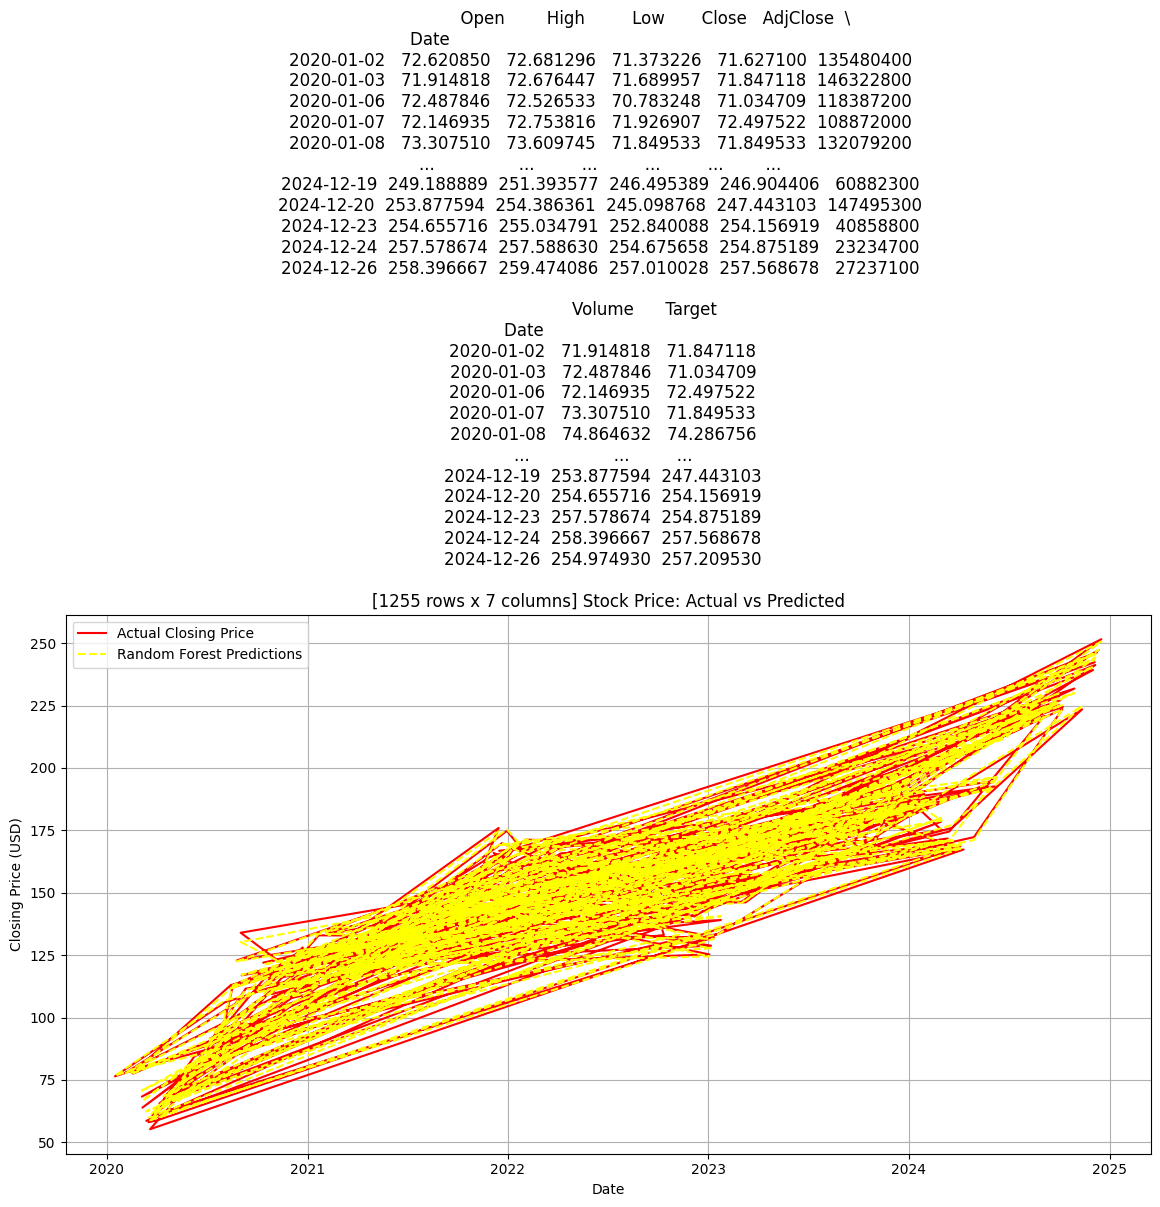

In [69]:
plt.figure(figsize=(14, 7))
plt.plot(Y_test.index, Y_test, label='Actual Closing Price', color='red')
plt.plot(Y_test.index, y_pred, label='Random Forest Predictions', color='yellow', linestyle='--')
plt.title(f'{stock} Stock Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()